# Meteo: Air temperature (TA) (2005-2024)

**Author**: Lukas Hörtnagl (holukas@ethz.ch)

# Variable

In [1]:
varname = 'VPD_T1_2_1'
var = "VPD"  # Name shown in plots
units = "kPa"

# Imports

In [2]:
import importlib.metadata
import warnings
from datetime import datetime
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import diive as dv
from diive.core.io.files import save_parquet, load_parquet
from diive.core.plotting.cumulative import CumulativeYear
from diive.core.plotting.bar import LongtermAnomaliesYear

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


# Load data

In [3]:
SOURCEDIR = r"../80_FINALIZE"
FILENAME = r"81.1_FLUXES_M15_MGMT_L4.2_NEE_GPP_RECO_LE_H_FN2O_FCH4.parquet"
FILEPATH = Path(SOURCEDIR) / FILENAME
df = load_parquet(filepath=FILEPATH)
df

Loaded .parquet file ..\80_FINALIZE\81.1_FLUXES_M15_MGMT_L4.2_NEE_GPP_RECO_LE_H_FN2O_FCH4.parquet (1.553 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-12  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-18  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-24  .PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-6  .SWC_GF1_0.15_1_gfXG_MEAN3H-12  .SWC_GF1_0.15_1_gfXG_MEAN3H-18  .SWC_GF1_0.15_1_gfXG_MEAN3H-24  .SWC_GF1_0.15_1_gfXG_MEAN3H-6  .TS_GF1_0.04_1_gfXG_MEAN3H-12  .TS_GF1_0.04_1_gfXG_MEAN3H-18  .TS_GF1_0.04_1_gfXG_MEAN3H-24  .TS_GF1_0.04_1_gfXG_MEAN3H-6  .TS_GF1_0.15_1_gfXG_MEAN3H-12  .TS_GF1_0.15_1_gfXG_MEAN3H-18  .TS_GF1_0.15_1_gfXG_MEAN3H-24  ...  GPP_NT_CUT_50_gfRF  RECO_DT_CUT_50_gfRF  GPP_DT_CUT_50_gfRF  RECO_DT_CUT_50_gfRF_SD  GPP_DT_CUT_50_gfRF_SD  G_GF1_0.03_1  G_GF1_0.03_2  G_GF1_0.05_1  G_GF1_0.05_2  G_GF4_0.02_1  G_GF5_0.02_1  LW_OUT_T1_2_1  NETRAD_T1_2_1  PPFD_OUT_T1_2_2  SW_OUT_T1_2_1
TIMESTAMP_MIDDLE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ...                                                                                                                                                                                                                                                              
2005-01-01 00:15:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.918553             0.093071                 0.0                0.080016                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 00:45:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.917972             0.092682                 0.0                0.079688                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 01:15:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN                             NaN                             NaN                            NaN                            NaN                            NaN                            NaN                           NaN                            NaN                            NaN                            NaN  ...            0.163001             0.093071                 0.0                0.080016                    0.0           NaN           NaN           NaN           NaN           NaN           NaN            NaN            NaN              NaN            NaN
2005-01-01 01:45:00                                 NaN                                 NaN                                 NaN                                NaN                             NaN  

TIMESTAMP_MIDDLE
2005-01-01 00:15:00    0.099893
2005-01-01 00:45:00    0.097606
2005-01-01 01:15:00    0.091683
2005-01-01 01:45:00    0.071157
2005-01-01 02:15:00    0.058333
                         ...   
2024-12-31 21:45:00    0.000011
2024-12-31 22:15:00    0.000011
2024-12-31 22:45:00    0.000011
2024-12-31 23:15:00    0.000010
2024-12-31 23:45:00    0.000010
Freq: 30min, Name: VPD_T1_2_1, Length: 350640, dtype: float64

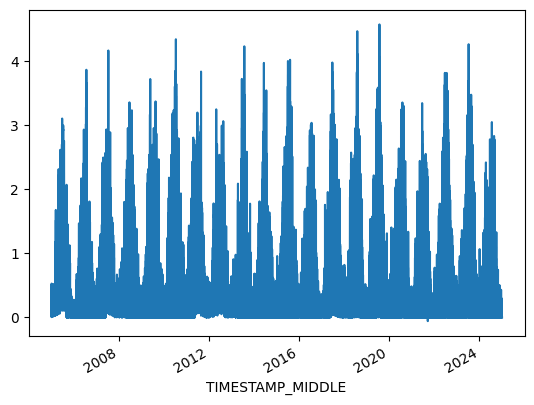

In [9]:
series = df[varname].copy()
series.plot(x_compat=True);
series

In [10]:
xlabel = f"{var} ({units})"
xlim = [series.min(), series.max()]

</br>

# Stats

## Overall mean

In [11]:
_yearly_avg = series.resample('YE').mean()
_overall_mean = _yearly_avg.mean()
_overall_sd = _yearly_avg.std()
print(f"Overall mean: {_overall_mean} +/- {_overall_sd}")

Overall mean: 0.31121955791661643 +/- 0.04902864837566863


## Yearly means

In [12]:
ym = series.resample('YE').mean()
ym

TIMESTAMP_MIDDLE
2005-12-31    0.376433
2006-12-31    0.225410
2007-12-31    0.328995
2008-12-31    0.310836
2009-12-31    0.311359
2010-12-31    0.297305
2011-12-31    0.366753
2012-12-31    0.359951
2013-12-31    0.271216
2014-12-31    0.256449
2015-12-31    0.343164
2016-12-31    0.268533
2017-12-31    0.358312
2018-12-31    0.381314
2019-12-31    0.309646
2020-12-31    0.303856
2021-12-31    0.221246
2022-12-31    0.346967
2023-12-31    0.334818
2024-12-31    0.251827
Freq: YE-DEC, Name: VPD_T1_2_1, dtype: float64

In [13]:
ym.sort_values(ascending=False)

TIMESTAMP_MIDDLE
2018-12-31    0.381314
2005-12-31    0.376433
2011-12-31    0.366753
2012-12-31    0.359951
2017-12-31    0.358312
2022-12-31    0.346967
2015-12-31    0.343164
2023-12-31    0.334818
2007-12-31    0.328995
2009-12-31    0.311359
2008-12-31    0.310836
2019-12-31    0.309646
2020-12-31    0.303856
2010-12-31    0.297305
2013-12-31    0.271216
2016-12-31    0.268533
2014-12-31    0.256449
2024-12-31    0.251827
2006-12-31    0.225410
2021-12-31    0.221246
Name: VPD_T1_2_1, dtype: float64

## Monthly averages

In [14]:
seriesdf = pd.DataFrame(series)
seriesdf['MONTH'] = seriesdf.index.month
seriesdf['YEAR'] = seriesdf.index.year
monthly_avg = seriesdf.groupby(['YEAR', 'MONTH'])[varname].mean().unstack()
monthly_avg

MONTH        1         2         3         4         5         6         7         8         9         10        11        12
YEAR                                                                                                                         
2005   0.133255  0.125461  0.320798  0.435624  0.631945  0.892239  0.703919  0.504649  0.379947  0.193942  0.133325  0.048627
2006   0.042295  0.079210  0.150229  0.200371  0.318859  0.548187  0.802910  0.202061  0.182587  0.095968  0.047289  0.023285
2007   0.074036  0.069035  0.159711  0.538353  0.442551  0.609129  0.679132  0.486520  0.387438  0.240121  0.143102  0.105334
2008   0.101163  0.166638  0.268867  0.270890  0.640051  0.579719  0.624814  0.467921  0.274886  0.190829  0.078831  0.054863
2009   0.054268  0.089716  0.207986  0.475443  0.553480  0.530131  0.565989  0.602001  0.351871  0.161345  0.073599  0.055018
2010   0.034755  0.114424  0.250507  0.450694  0.309132  0.641680  0.775310  0.427092  0.296411  0.141553  0.086047  0.031565
2011   0.074014  0.114899  0.251863  0.581882  0.666643  0.590370  0.568899  0.682791  0.413194  0.205884  0.090626  0.142344
2012   0.143005  0.136775  0.382794  0.406973  0.603079  0.595387  0.611613  0.677814  0.332750  0.174978  0.127317  0.113257
2013   0.094633  0.118700  0.151919  0.296454  0.270358  0.545255  0.791319  0.515140  0.281154  0.089021  0.066108  0.023130
2014   0.027523  0.072557  0.203056  0.259976  0.371139  0.634490  0.447117  0.435652  0.328777  0.173127  0.051202  0.062999
2015   0.087011  0.080146  0.237306  0.421110  0.411199  0.630129  0.951911  0.668726  0.309405  0.137561  0.119234  0.042231
2016   0.085863  0.143620  0.210320  0.261039  0.408584  0.398482  0.625289  0.506644  0.396226  0.111058  0.051096  0.017171
2017   0.063720  0.120993  0.276426  0.338306  0.588850  0.842018  0.701453  0.599454  0.311367  0.252083  0.109643  0.077889
2018   0.137392  0.107644  0.165561  0.549344  0.466748  0.671946  1.003826  0.806515  0.436501  0.138281  0.021613  0.048886
2019   0.046392  0.133999  0.290680  0.316956  0.312127  0.762132  0.866354  0.456032  0.309308  0.114732  0.041034  0.055166
2020   0.038153  0.238026  0.222998  0.550285  0.479921  0.454533  0.654878  0.533983  0.330215  0.098995  0.033549  0.011433
2021   0.026035  0.082336  0.215003  0.379660  0.336810  0.511504  0.321846  0.359091  0.292334  0.100865  0.015050  0.011092
2022   0.037497  0.151235  0.319133  0.306950  0.470408  0.627205  0.910720  0.748110  0.311619  0.149694  0.072762  0.037093
2023   0.074762  0.137025  0.220513  0.216325  0.383360  0.916441  0.648015  0.614304  0.419083  0.220624  0.100025  0.058283
2024   0.074640  0.111231  0.206013  0.344785  0.330871  0.445858  0.536684  0.562334  0.223922  0.080089  0.054793  0.043635

## Number of days below ...

In [15]:
# plotdf = df[[varname]].copy()
# plotdf = plotdf.resample('D').min()
# belowzero = plotdf.loc[plotdf[varname] < 0].copy()
# belowzero = belowzero.groupby(belowzero.index.year).count()
# belowzero["YEAR"] = belowzero.index
# belowzero
# belowzero.plot.bar(x="YEAR", y=varname, title=f"Number of days with {varname} < 0°");
# display(belowzero)
# print(f"Average per year: {belowzero[varname].mean()} +/- {belowzero[varname].std():.2f} SD")

## Number of days above ...

VPD_T1_2_1  YEAR
TIMESTAMP_MIDDLE                  
2005                      26  2005
2006                      32  2006
2007                      30  2007
2008                      37  2008
2009                      48  2009
2010                      49  2010
2011                      40  2011
2012                      20  2012
2013                      36  2013
2014                      20  2014
2015                      49  2015
2016                      28  2016
2017                      48  2017
2018                      72  2018
2019                      45  2019
2020                      46  2020
2021                      29  2021
2022                      60  2022
2023                      57  2023
2024                      32  2024

Average per year: 40.2 +/- 13.72 SD


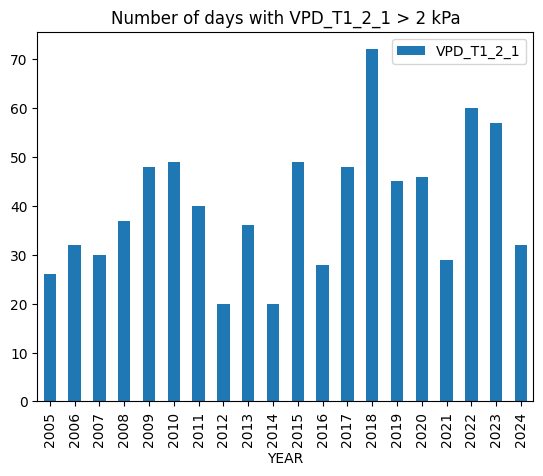

In [18]:
plotdf = df[[varname]].copy()
plotdf = plotdf.resample('D').max()
above = plotdf.loc[plotdf[varname] > 2].copy()
above = above.groupby(above.index.year).count()
above["YEAR"] = above.index
above.plot.bar(x="YEAR", y=varname, title=f"Number of days with {varname} > 2 {units}");
display(above)
print(f"Average per year: {above[varname].mean()} +/- {above[varname].std():.2f} SD")

</br>

# Heatmap plots

## Half-hourly

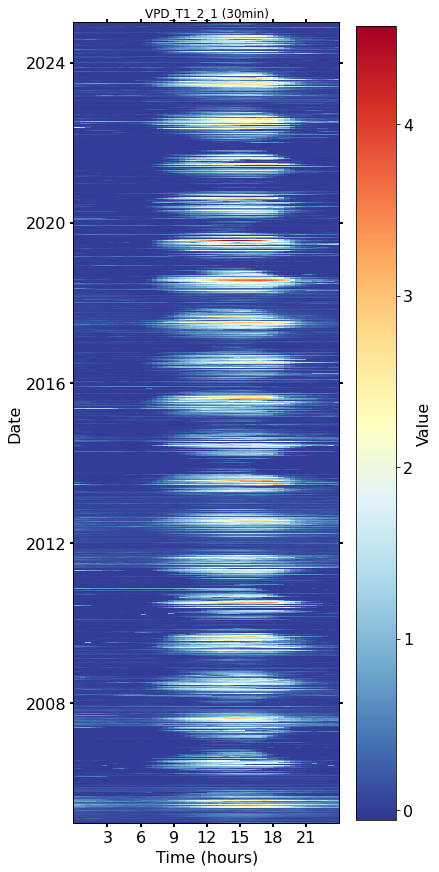

In [19]:
fig, axs = plt.subplots(ncols=1, figsize=(6, 12), dpi=72, layout="constrained")
dv.heatmapdatetime(series=series, ax=axs, cb_digits_after_comma=0).plot()

## Monthly

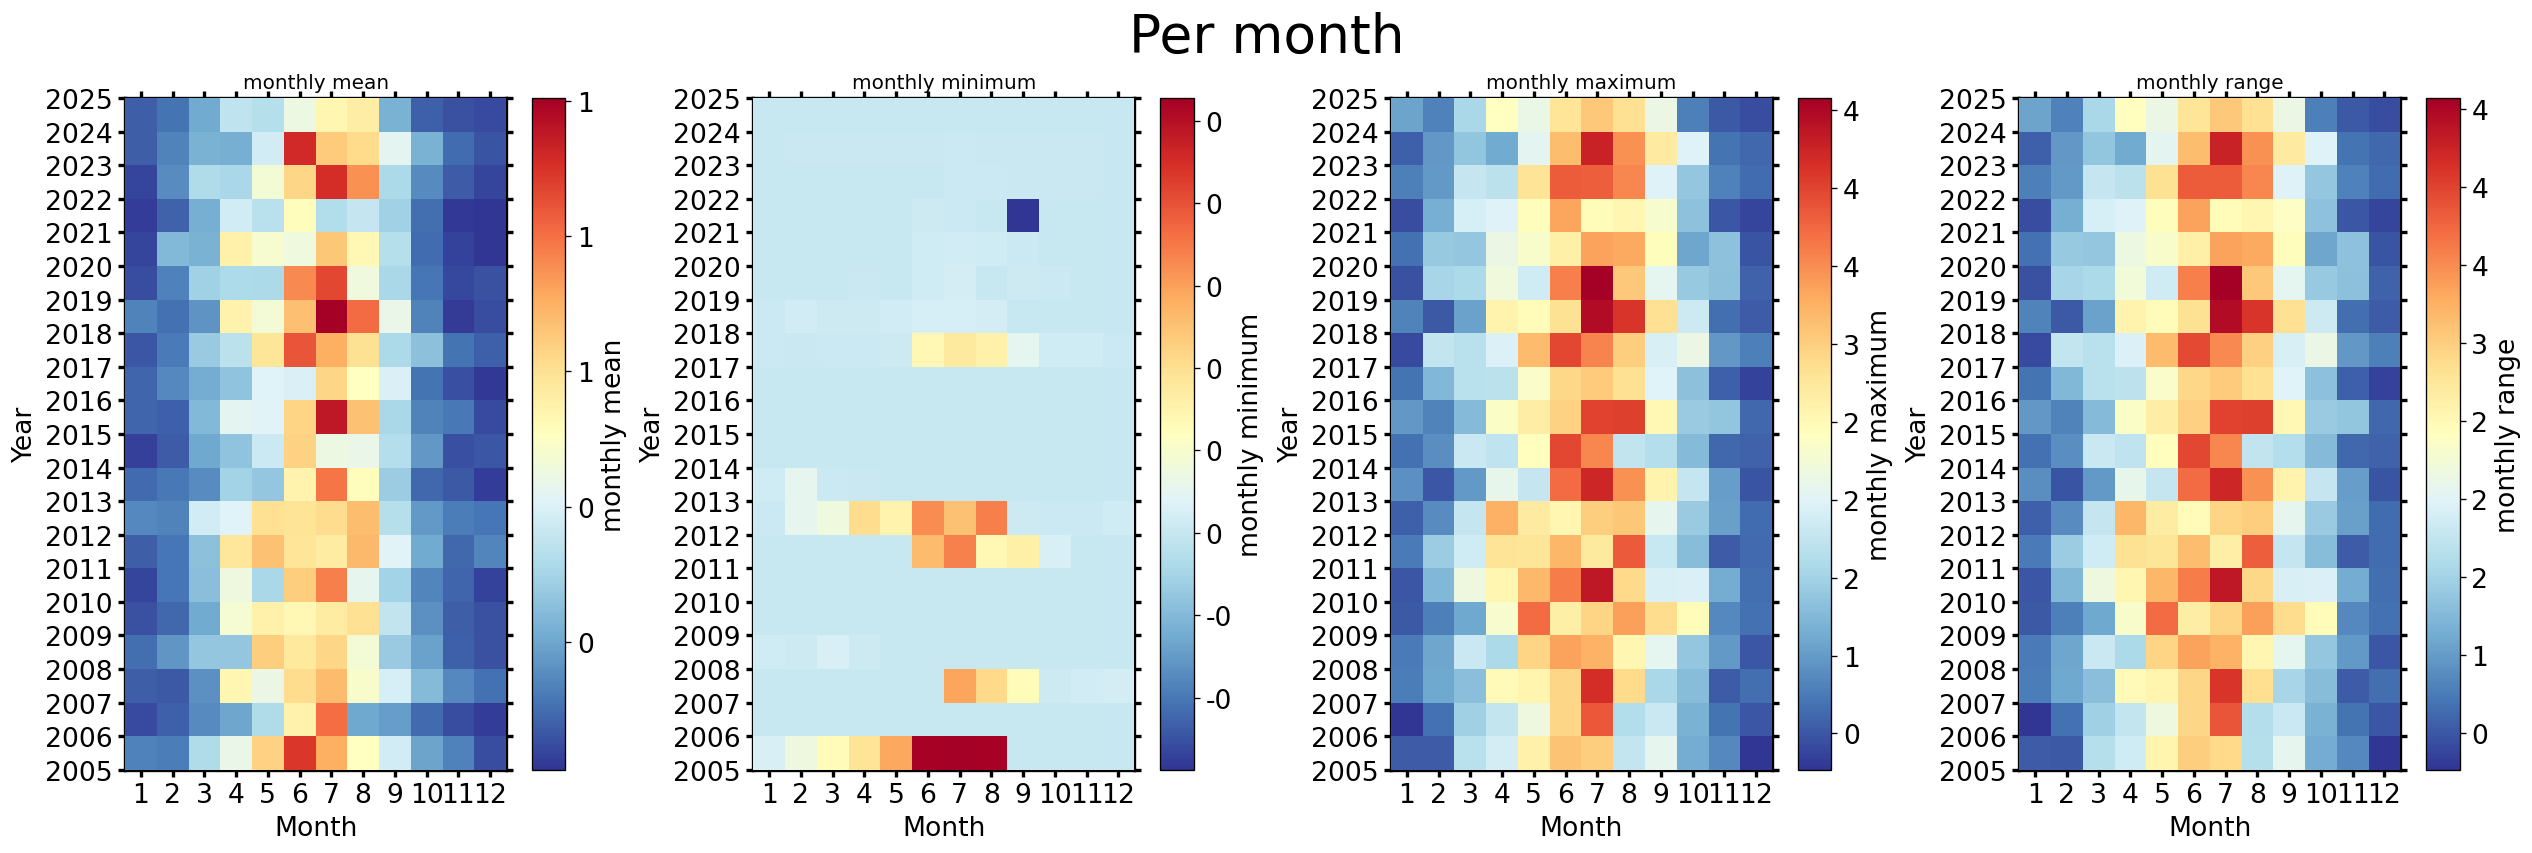

In [20]:
fig, axs = plt.subplots(ncols=4, figsize=(21, 7), dpi=120, layout="constrained")
fig.suptitle(f'Per month', fontsize=32)
dv.heatmapyearmonth(series_monthly=series.resample('M').mean(), title="monthly mean", ax=axs[0], cb_digits_after_comma=0, zlabel="monthly mean").plot()
dv.heatmapyearmonth(series_monthly=series.resample('M').min(), title="monthly minimum", ax=axs[1], cb_digits_after_comma=0, zlabel="monthly minimum").plot()
dv.heatmapyearmonth(series_monthly=series.resample('M').max(), title="monthly maximum", ax=axs[2], cb_digits_after_comma=0, zlabel="monthly maximum").plot()
_range = series.resample('M').max().sub(series.resample('M').min())
dv.heatmapyearmonth(series_monthly=_range, title="monthly range", ax=axs[3], cb_digits_after_comma=0, zlabel="monthly range").plot()

## Monthly ranks

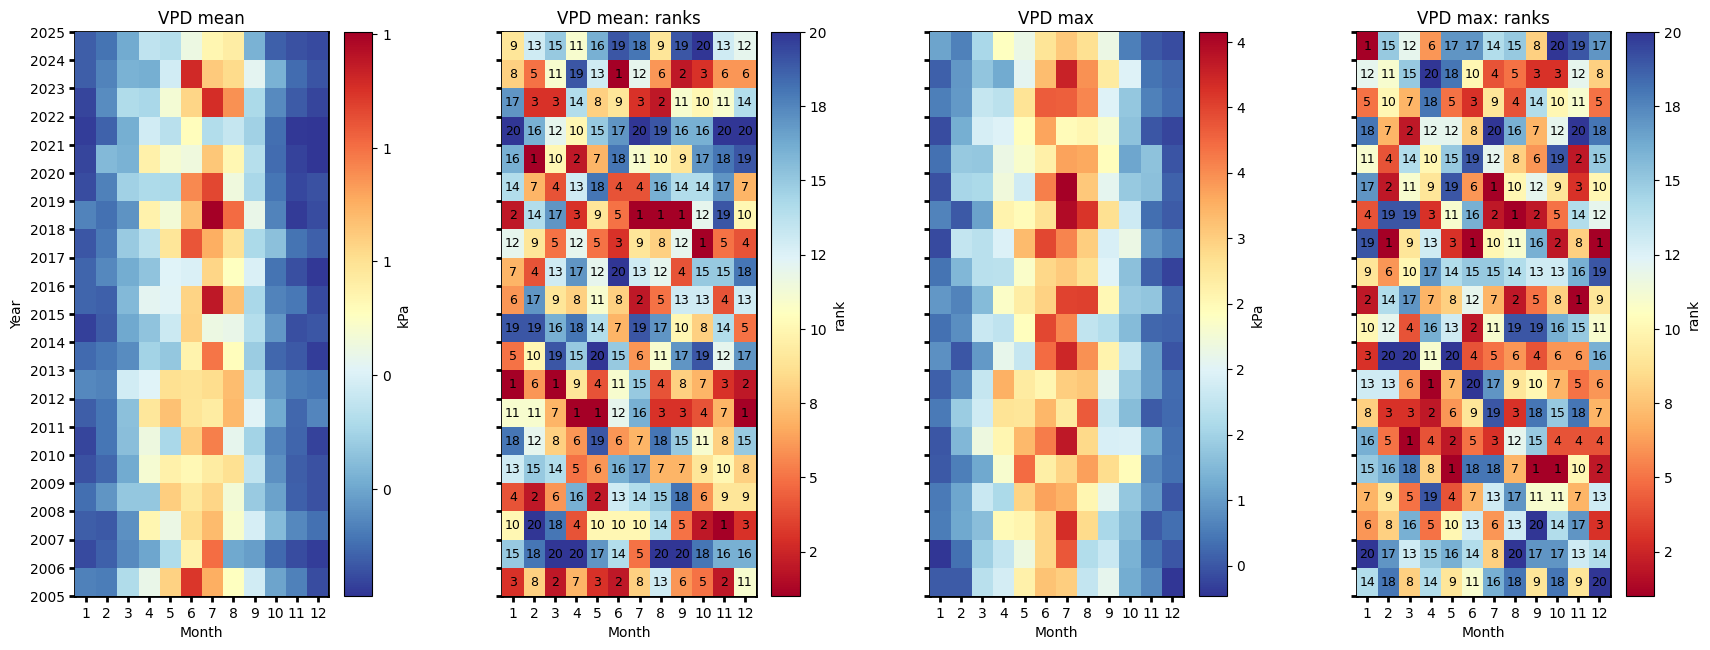

In [24]:
# Figure
fig = plt.figure(facecolor='white', figsize=(17, 6))

# Gridspec for layout
gs = gridspec.GridSpec(1, 4)  # rows, cols
gs.update(wspace=0.35, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax_mean = fig.add_subplot(gs[0, 0])
ax_mean_ranks = fig.add_subplot(gs[0, 1])
ax_max = fig.add_subplot(gs[0, 2])
ax_max_ranks = fig.add_subplot(gs[0, 3])
params = {'axlabels_fontsize': 10, 'ticks_labelsize': 10, 'cb_labelsize': 10}
dv.heatmapyearmonth_ranks(ax=ax_mean, series=series, agg='mean', ranks=False, zlabel=units, cmap="RdYlBu_r", show_values=False, **params).plot()

hm_mean_ranks = dv.heatmapyearmonth_ranks(ax=ax_mean_ranks, series=series, agg='mean', show_values=True, **params)
hm_mean_ranks.plot()

dv.heatmapyearmonth_ranks(ax=ax_max, series=series, agg='max', ranks=False, zlabel=units, cmap="RdYlBu_r", show_values=False, **params).plot()
dv.heatmapyearmonth_ranks(ax=ax_max_ranks, series=series, agg='max', show_values=True, **params).plot()

ax_mean.set_title(f"{var} mean", color='black')
ax_mean_ranks.set_title(f"{var} mean: ranks", color='black')
ax_max.set_title(f"{var} max", color='black')
ax_max_ranks.set_title(f"{var} max: ranks", color='black')

ax_mean.tick_params(left=True, right=False, top=False, bottom=True,
                    labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_mean_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                   labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

ax_mean_ranks.set_ylabel("")
ax_max.set_ylabel("")
ax_max_ranks.set_ylabel("")

fig.show()

### Mean ranks per year

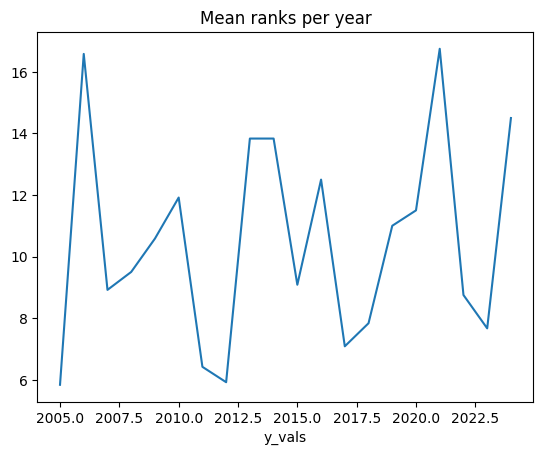

In [25]:
hm_mean_ranks.hm.get_plot_data().mean(axis=1).plot(title="Mean ranks per year");

</br>

# Ridgeline plots

## Yearly

In [29]:
# rp = dv.ridgeline(series=series)
# rp.plot(
#     how='yearly',
#     kd_kwargs=None,  # params from scikit KernelDensity as dict
#     xlim=xlim,  # min/max as list
#     ylim=[0, 0.50],  # min/max as list
#     hspace=-0.8,  # overlap between months
#     xlabel=f"{var} ({units})",
#     fig_width=5,
#     fig_height=9,
#     shade_percentile=0.5,
#     show_mean_line=False,
#     fig_title=f"{var} per year (2005-2024)",
#     fig_dpi=72,
#     showplot=True,
#     ascending=False
# )

## Monthly

In [30]:
# rp.plot(
#     how='monthly',
#     kd_kwargs=None,  # params from scikit KernelDensity as dict
#     xlim=xlim,  # min/max as list
#     ylim=[0, 0.14],  # min/max as list
#     hspace=-0.6,  # overlap between months
#     xlabel=f"{var} ({units})",
#     fig_width=4.5,
#     fig_height=8,
#     shade_percentile=0.5,
#     show_mean_line=False,
#     fig_title=f"{var} per month (2005-2024)",
#     fig_dpi=72,
#     showplot=True,
#     ascending=False
# )

## Weekly

In [31]:
# rp.plot(
#     how='weekly',
#     kd_kwargs=None,  # params from scikit KernelDensity as dict
#     xlim=xlim,  # min/max as list
#     ylim=[0, 0.15],  # min/max as list
#     hspace=-0.6,  # overlap
#     xlabel=f"{var} ({units})",
#     fig_width=6,
#     fig_height=16,
#     shade_percentile=0.5,
#     show_mean_line=False,
#     fig_title=f"{var} per week (2005-2024)",
#     fig_dpi=72,
#     showplot=True,
#     ascending=False
# )

## Single years per month

In [32]:
# uniq_years = series.index.year.unique()
# for uy in uniq_years:
#     series_yr = series.loc[series.index.year == uy].copy()
#     rp = dv.ridgeline(series=series_yr)
#     rp.plot(
#         how='monthly',
#         kd_kwargs=None,  # params from scikit KernelDensity as dict
#         xlim=xlim,  # min/max as list
#         ylim=[0, 0.18],  # min/max as list
#         hspace=-0.6,  # overlap
#         xlabel=f"{var} ({units})",
#         fig_width=6,
#         fig_height=7,
#         shade_percentile=0.5,
#         show_mean_line=False,
#         fig_title=f"{var} per month ({uy})",
#         fig_dpi=72,
#         showplot=True,
#         ascending=False
#     )

## Single years per week

In [33]:
# uniq_years = series.index.year.unique()
# for uy in uniq_years:
#     series_yr = series.loc[series.index.year == uy].copy()
#     rp = dv.ridgeline(series=series_yr)
#     rp.plot(
#         how='weekly',
#         kd_kwargs=None,  # params from scikit KernelDensity as dict
#         xlim=xlim,  # min/max as list
#         ylim=[0, 0.3],  # min/max as list
#         hspace=-0.8,  # overlap
#         xlabel=f"{var} ({units})",
#         fig_width=9,
#         fig_height=18,
#         shade_percentile=0.5,
#         show_mean_line=False,
#         fig_title=f"{var} per week ({uy})",
#         fig_dpi=72,
#         showplot=True,
#         ascending=False
#     )

</br>

# Cumulative plot

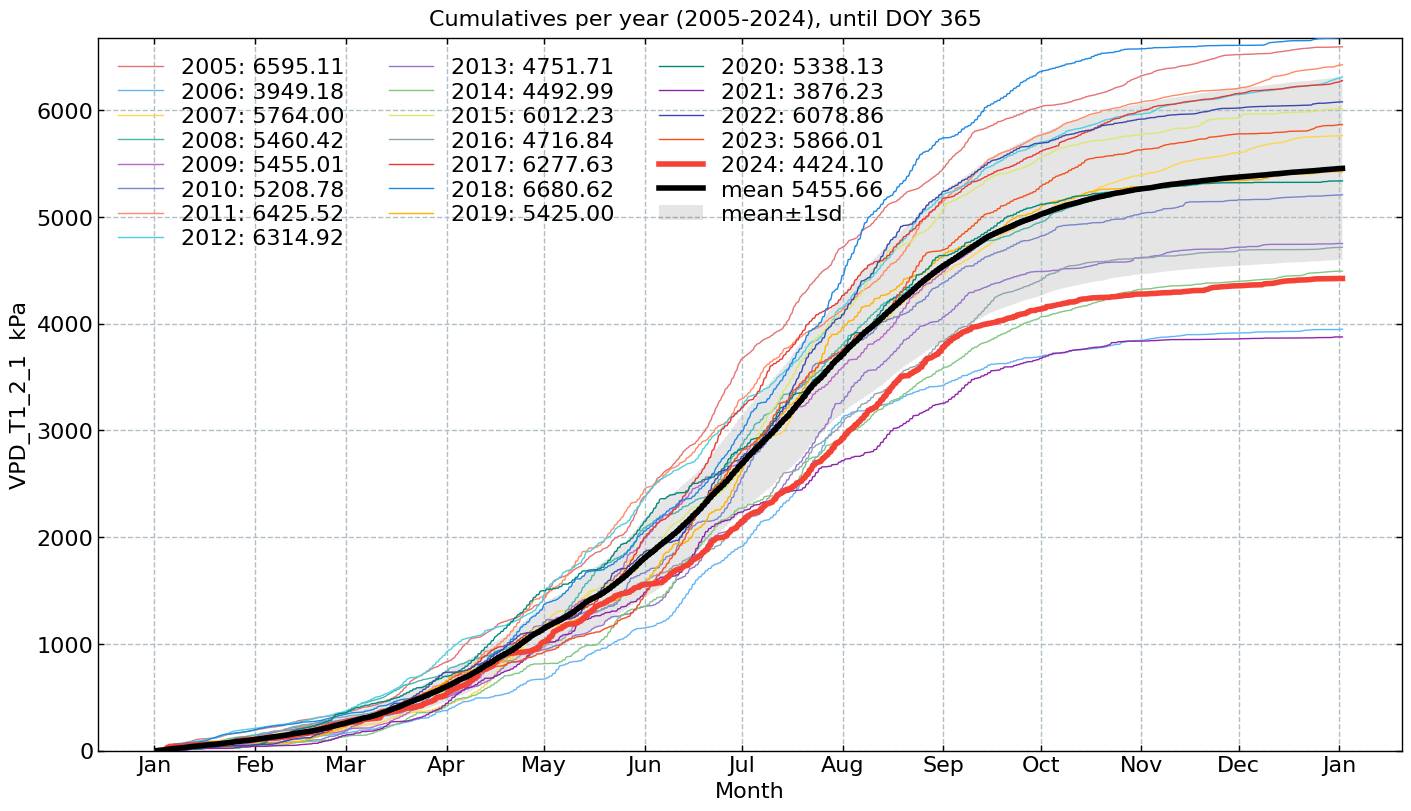

In [34]:
CumulativeYear(
    series=series,
    series_units=units,
    start_year=2005,
    end_year=2024,
    show_reference=True,
    excl_years_from_reference=None,
    highlight_year=2024,
    highlight_year_color='#F44336').plot();

</br>

# Long-term anomalies

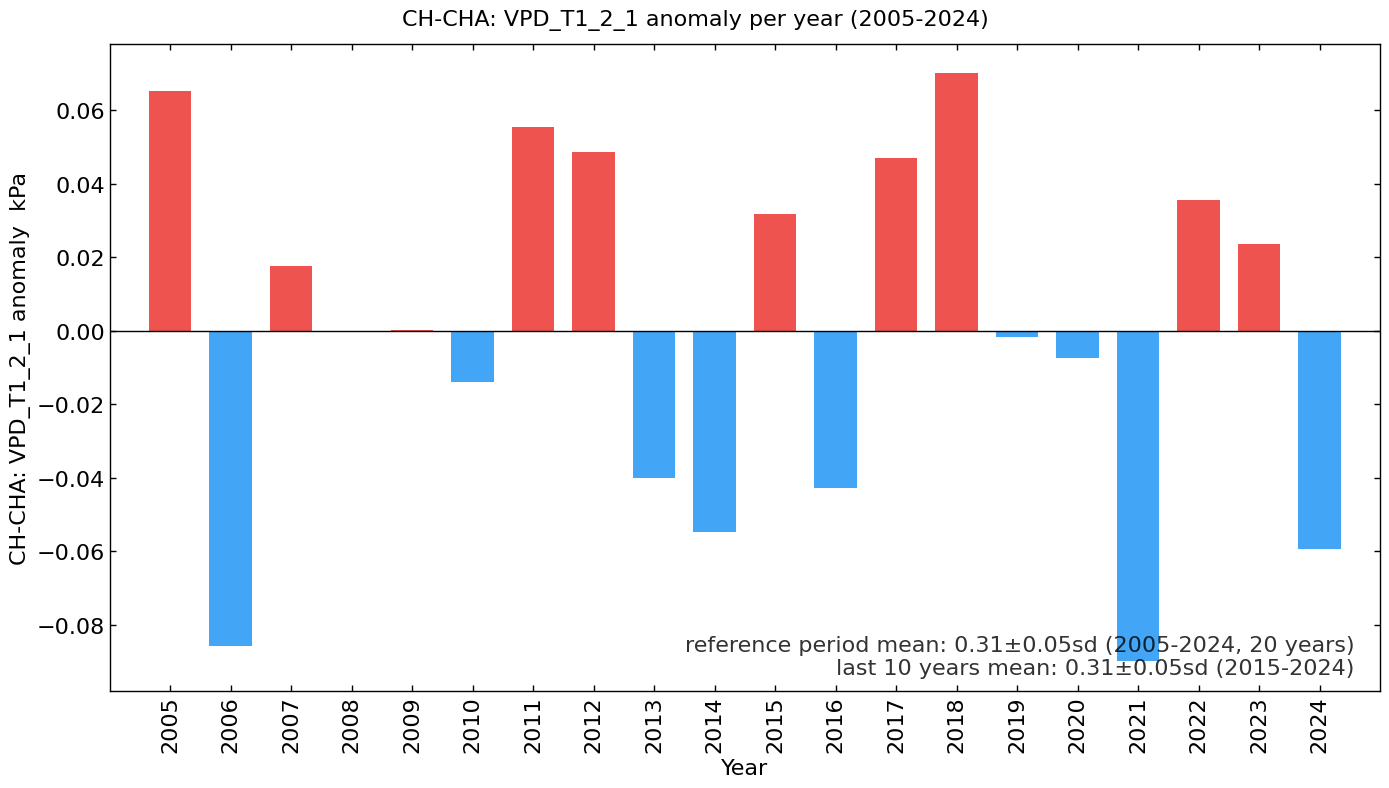

In [35]:
series_yearly_mean = series.resample('YE').mean()
series_yearly_mean.index = series_yearly_mean.index.year
series_label = f"CH-CHA: {varname}"
LongtermAnomaliesYear(series=series_yearly_mean,
                      series_label=series_label,
                      series_units=units,
                      reference_start_year=2005,
                      reference_end_year=2024).plot()

</br>

# End of notebook

In [36]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-05-16 13:10:31
